In [ ]:
options(repr.plot.width = 8 , repr.plot.height = 5)

# Lecture 3: Advanced data transformations and pipelines

<div style="border: 1px double black; padding: 10px; margin: 10px">

**Goals for today's lecture:**
* Use the skills that we learned last week to do advanced data analysis
* Construct pipelines of data transformations
    
This lecture note corresponds to Chapters 4 and 5 of your book.
</div>

In [3]:
# packages we will be using in today's lecture:
library(tidyverse)  # always!
# install these packages if needed
# install.packages('nycflights13')
# install.packages('babynames')
library(nycflights13)
library(babynames)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


## Review of week 2
Last lecture we learned how to alter the rows and columns of a dataframe:
- `filter()` to keep certain rows that satisfy logical conditions.
- `arrange()` to sort rows according to certain column values.
- `distinct()` to keep only rows that are distinct on some combination of columns.
- `select()` to drop/rename/rearrange columns
- `group_by()` to tell R how your data are grouped
- `summarize()` to create summary tables of your (grouped) data
- `top_n()` to get the top n records for the given column values

## Revisiting the pipe (`%>%`) operator

![pipes](https://i0.wp.com/www.rforecology.com/pipes_image0.png?zoom=2&w=578&ssl=1)

`%>%` (pronounced: "pipe") works by taking the **output** from the left-hand side, and feeding it in as the **input** on the right-hand side:

<div style="margin: 0 auto; padding: 50px; font-size: 36px">
    <code style="background: lightgreen; padding: 5px">output</code>
    <code> %&gt;% </code>
    <code>function(<code style="background: lightgreen; padding: 5px">input</code>, args...)</code>
</div>

## Practice forming pipelines


### Using the `n()`, `count()`, and `n_distinct()` functions

Find the total count of flights from each airport


In [ ]:
## using group_by, summarize and n
flights %>% group_by(origin) %>% summarise(total = n())

origin,total
<chr>,<int>
EWR,120835
JFK,111279
LGA,104662


In [ ]:
flights$origin %>% unique

[1] "EWR" "LGA" "JFK"

### group_by revisited

"When you summarize a tibble grouped by more than one variable, each summary peels off the last group"


In [ ]:
flights %>%
  group_by(year, month, day) %>%
  summarize(n = n()) %>%
  summarize(sum = sum(n))

`summarise()` has grouped output by 'year', 'month'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'year'. You can override using the
`.groups` argument.


year,month,sum
<int>,<int>,<int>
2013,1,27004
2013,2,24951
2013,3,28834
2013,4,28330
2013,5,28796
2013,6,28243
2013,7,29425
2013,8,29327
2013,9,27574


In [ ]:
flights %>%
  group_by(year, month, day) %>%
  summarize(n = n()) %>%
  summarize(sum = sum(n))

`summarise()` has grouped output by 'year', 'month'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'year'. You can override using the
`.groups` argument.


year,month,sum
<int>,<int>,<int>
2013,1,27004
2013,2,24951
2013,3,28834
2013,4,28330
2013,5,28796
2013,6,28243
2013,7,29425
2013,8,29327
2013,9,27574


In [ ]:
data1 <- tibble(col1 = c('a','a','a','b','b','b','b','c','c','c'),
                col2 = c(10, 10, 2, 3, 4, 5, 6, 7, 8, 9))
data1

col1,col2
<chr>,<dbl>
a,10
a,10
a,2
b,3
b,4
b,5
b,6
c,7
c,8


In [ ]:
data1 %>% group_by(col1) %>%
  summarise(row_count = n(), total = sum(col2))

col1,row_count,total
<chr>,<int>,<dbl>
a,3,22
b,4,18
c,3,24


In [ ]:
data1 %>% group_by(col1, col2) %>%
  summarise(row_count = n(), total = sum(col2))

`summarise()` has grouped output by 'col1'. You can override using the
`.groups` argument.


col1,col2,row_count,total
<chr>,<dbl>,<int>,<dbl>
a,2,1,2
a,10,2,20
b,3,1,3
b,4,1,4
b,5,1,5
b,6,1,6
c,7,1,7
c,8,1,8
c,9,1,9


In [ ]:
flights$day %>% unique

[1]  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
[26] 26 27 28 29 30 31

In [ ]:
flights %>%
  group_by(year, month, day) %>%
  group_vars

[1] "year"  "month" "day"

To remove the warning you can explictly add the `.groups=drop` to keep it you would add `.groups=keep`

In [ ]:
flights %>%
group_by(year, month, day) %>%
summarize(n = n(), .groups='keep') %>%
print

# A tibble: 365 × 4
# Groups:   year, month, day [365]
    year month   day     n
   <int> <int> <int> <int>
 1  2013     1     1   842
 2  2013     1     2   943
 3  2013     1     3   914
 4  2013     1     4   915
 5  2013     1     5   720
 6  2013     1     6   832
 7  2013     1     7   933
 8  2013     1     8   899
 9  2013     1     9   902
10  2013     1    10   932
# ℹ 355 more rows


## Using `count` to get the same result

In [ ]:
# using count
flights %>% count(origin, dest, name = 'total', sort=T)

origin,n
<chr>,<int>
EWR,120835
JFK,111279
LGA,104662


In [ ]:
# using count with name = 'total' and sort = T

In [ ]:
# Find the total number of unique carriers

flights$carrier %>% unique %>% length

[1] 16

In [ ]:
# using n_distinct
n_distinct(flights$carrier)

[1] 16

## &#129300; Quiz
In the flights dataset, the number of aircraft (tailnum) that are used by multiple carriers is:

1. 20
2. 19
3. 18
4. 17

In [ ]:
# you can use some of the functions like distinct, count, filter
flights %>% filter(!is.na(tailnum)) %>%
  distinct(tailnum, carrier) %>%
    count(tailnum) %>% filter(n > 1) %>%
      nrow

[1] 17

### Stepping up the complexity
Let's find the most delayed flight (highest departure delay) for each day of the year:
    
    # A tibble: 370 × 19
    # Groups:   year, month, day [365]
        year month   day dep_time sched_de…¹ dep_d…² arr_t…³ sched…⁴ arr_d…⁵ carrier
       <int> <int> <int>    <int>      <int>   <dbl>   <int>   <int>   <dbl> <chr>  
     1  2013     1     1      848       1835     853    1001    1950     851 MQ     
     2  2013     1     2     2131       1512     379    2340    1741     359 UA     

In [ ]:
# most delayed flight for each day
flights %>%
  group_by(year, month, day) %>%
    top_n(1, dep_delay)

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,848,1835,853,1001,1950,851,MQ,3944,N942MQ,JFK,BWI,41,184,18,35,2013-01-01 18:00:00
2013,1,2,2131,1512,379,2340,1741,359,UA,488,N593UA,LGA,DEN,228,1620,15,12,2013-01-02 15:00:00
2013,1,3,2056,1605,291,2239,1754,285,9E,3459,N928XJ,JFK,BNA,125,765,16,5,2013-01-03 16:00:00
2013,1,4,2123,1635,288,2332,1856,276,EV,3805,N29917,EWR,SAV,109,708,16,35,2013-01-04 16:00:00
2013,1,5,1344,817,327,1635,1127,308,DL,1109,N309US,LGA,TPA,158,1010,8,17,2013-01-05 08:00:00
2013,1,6,1242,920,202,1527,1233,174,UA,1142,N74856,EWR,LAX,324,2454,9,20,2013-01-06 09:00:00
2013,1,7,2021,1415,366,2332,1724,368,B6,377,N789JB,LGA,FLL,153,1076,14,15,2013-01-07 14:00:00
2013,1,8,1307,959,188,1426,1122,184,EV,5736,N826AS,LGA,IAD,43,229,9,59,2013-01-08 09:00:00
2013,1,9,641,900,1301,1242,1530,1272,HA,51,N384HA,JFK,HNL,640,4983,9,0,2013-01-09 09:00:00


What about the *second-most* delayed flight for each day?

    # A tibble: 369 × 20
    # Groups:   year, month, day [360]
        year month   day dep_time sched_de…¹ dep_d…² arr_t…³ sched…⁴ arr_d…⁵ carrier
       <int> <int> <int>    <int>      <int>   <dbl>   <int>   <int>   <dbl> <chr>  
     1  2013     1     1     2343       1724     379     314    1938     456 EV     
     2  2013     1     2     1607       1030     337    2003    1355     368 AA     
     3  2013     1     3     2008       1540     268    2339    1909     270 DL     

In [ ]:
flights %>% group_by(year, month, day) %>%
  mutate(rank = min_rank(-dep_delay), .before = 'year') %>%
    filter(rank == 2)

rank,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2,2013,1,1,2343,1724,379,314,1938,456,EV,4321,N21197,EWR,MCI,222,1092,17,24,2013-01-01 17:00:00
2,2013,1,2,1607,1030,337,2003,1355,368,AA,179,N324AA,JFK,SFO,346,2586,10,30,2013-01-02 10:00:00
2,2013,1,3,2008,1540,268,2339,1909,270,DL,2027,N338NW,JFK,FLL,158,1069,15,40,2013-01-03 15:00:00
2,2013,1,4,2058,1730,208,2,2110,172,B6,179,N523JB,JFK,PHX,285,2153,17,30,2013-01-04 17:00:00
2,2013,1,5,1232,815,257,1405,957,248,9E,3521,N907XJ,JFK,ORD,133,740,8,15,2013-01-05 08:00:00
2,2013,1,6,943,700,163,1227,932,175,EV,4304,N11106,EWR,MSY,200,1167,7,0,2013-01-06 07:00:00
2,2013,1,6,1113,830,163,1253,1013,160,EV,3815,N26549,EWR,GSO,80,445,8,30,2013-01-06 08:00:00
2,2013,1,7,1323,830,293,1604,1154,250,UA,112,N12116,JFK,LAX,311,2475,8,30,2013-01-07 08:00:00
2,2013,1,8,1612,1330,162,1844,1617,147,B6,525,N309JB,EWR,MCO,139,937,13,30,2013-01-08 13:00:00


To do this question (easily) we will use a new function, `min_rank()` (see Chapter 15 of the reading). This function takes a vector of numbers and returns their rank:

In [ ]:
min_rank(c(5, 1, 3, 10, 15))

[1] 3 1 2 4 5

In [ ]:
# find the second-most delayed flight of the year

flights %>%
  mutate(rank = min_rank(-dep_delay), .before = 'year') %>%
    filter(rank == 2)

rank,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2,2013,6,15,1432,1935,1137,1607,2120,1127,MQ,3535,N504MQ,JFK,CMH,74,483,19,35,2013-06-15 19:00:00


If I create a list of the ten most (departure-)delayed flights for each day of the year, which carrier appears most frequently on that list?


In [ ]:
# most commonly delayed carrier

flights %>% group_by(year, month, day) %>%
  top_n(10, dep_delay) %>% ungroup %>% count(carrier, sort = T)

carrier,n
<chr>,<int>
EV,949
UA,539
B6,512
DL,423
9E,329
AA,319
MQ,238
WN,139
VX,86


### What about the proportion of delayed flights?



In [10]:
# proportion of delayed flights for each origin
flights %>%
  filter(!is.na(dep_delay)) %>%
  group_by(origin) %>%
    summarise(
      total = n(),
      delayed = sum(dep_delay > 10),
      prop = delayed/total
    ) %>% print

# A tibble: 3 × 4
  origin  total delayed  prop
  <chr>   <int>   <int> <dbl>
1 EWR    117596   33860 0.288
2 JFK    109416   26631 0.243
3 LGA    101509   22343 0.220


In [9]:
a <- c(T, F, T)
sum(a)

[1] 2

`summarise()` has grouped output by 'origin'. You can override using the
`.groups` argument.


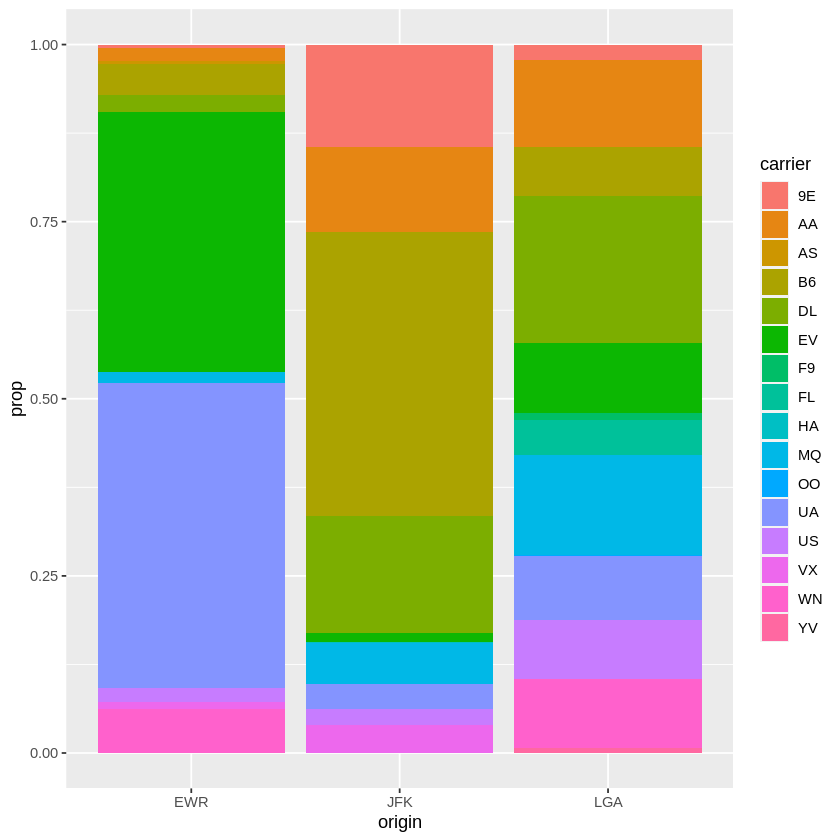

### Question

Just because the count of delayed flights is higher for a particular carrier, can we conclude that we should avoid booking tickets through that carrier?

Why or why not?



## And now for something completely different
![babies](https://images.ctfassets.net/cnu0m8re1exe/PYLeBWr2QDF5yjyZwB5Iq/7509e49d1d621860c1d4c484243c23db/shutterstock_189429203.jpg)

The US Social Security Administration keeps records of every child born in the United States each year. Using this information, they have produced a [public database](https://www.ssa.gov/oact/babynames/) of name frequencies in the U.S.

In [11]:
head(babynames)

year,sex,name,n,prop
<dbl>,<chr>,<chr>,<int>,<dbl>
1880,F,Mary,7065,0.07238359
1880,F,Anna,2604,0.02667896
1880,F,Emma,2003,0.02052149
1880,F,Elizabeth,1939,0.01986579
1880,F,Minnie,1746,0.01788843
1880,F,Margaret,1578,0.01616720


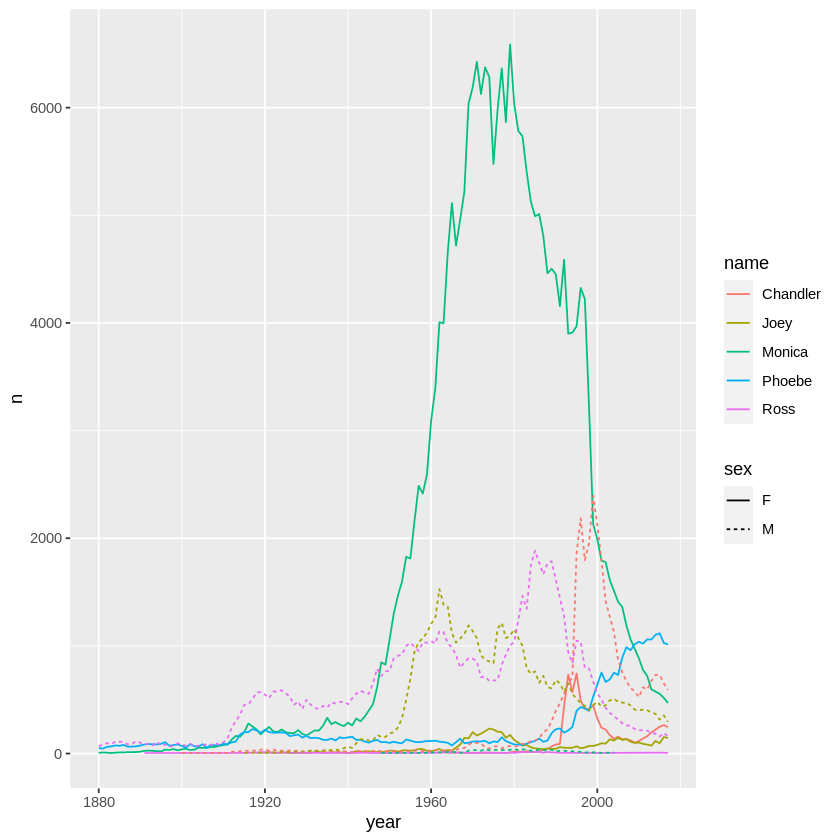

In [22]:
# Plot the trend of the following names 'Chandler', 'Joey', 'Monica', 'Phoebe', 'Ross' over time

babynames %>%
  filter(name %in% c('Chandler', 'Joey', 'Monica', 'Phoebe', 'Ross')) %>%
    ggplot(aes(x = year, y = n, color = name)) +
    geom_line(aes(linetype = sex))

In [21]:

babynames %>%
  filter(name %in% c('Chandler'), sex == 'F') %>% print

# A tibble: 47 × 5
    year sex   name         n       prop
   <dbl> <chr> <chr>    <int>      <dbl>
 1  1962 F     Chandler    10 0.00000493
 2  1970 F     Chandler     5 0.00000273
 3  1972 F     Chandler     6 0.00000372
 4  1973 F     Chandler     5 0.00000322
 5  1974 F     Chandler     8 0.00000511
 6  1976 F     Chandler     7 0.00000445
 7  1977 F     Chandler     7 0.00000426
 8  1978 F     Chandler     5 0.00000304
 9  1979 F     Chandler     7 0.00000406
10  1980 F     Chandler    19 0.0000107 
# ℹ 37 more rows


### Glimpse into strings
We will deep dive into strings after midterm, but for now, let us understand some basic functions that we can apply to strings
* str_sub()
* length(str)

In [ ]:
# Multiple ways of initializing a string; both single and double quotes work
my_str1 = "text manipulation is fun"
print(my_str1)
my_str2 = 'text manipulation is fun'
print(my_str2)

[1] "text manipulation is fun"
[1] "text manipulation is fun"
 num 123


In [24]:
# to find str length
str_length("abcde")

[1] 5

In [25]:
babynames %>% mutate(name_length = str_length(name)) %>%
  print

# A tibble: 1,924,665 × 6
    year sex   name          n   prop name_length
   <dbl> <chr> <chr>     <int>  <dbl>       <int>
 1  1880 F     Mary       7065 0.0724           4
 2  1880 F     Anna       2604 0.0267           4
 3  1880 F     Emma       2003 0.0205           4
 4  1880 F     Elizabeth  1939 0.0199           9
 5  1880 F     Minnie     1746 0.0179           6
 6  1880 F     Margaret   1578 0.0162           8
 7  1880 F     Ida        1472 0.0151           3
 8  1880 F     Alice      1414 0.0145           5
 9  1880 F     Bertha     1320 0.0135           6
10  1880 F     Sarah      1288 0.0132           5
# ℹ 1,924,655 more rows



# What sum of names end in 'a'?

To tackle this problem, we're going to need a way to extract the last character of a name using `str_sub`

In [30]:
str_sub('Alejandro', -1)

[1] FALSE

In [28]:
?str_sub

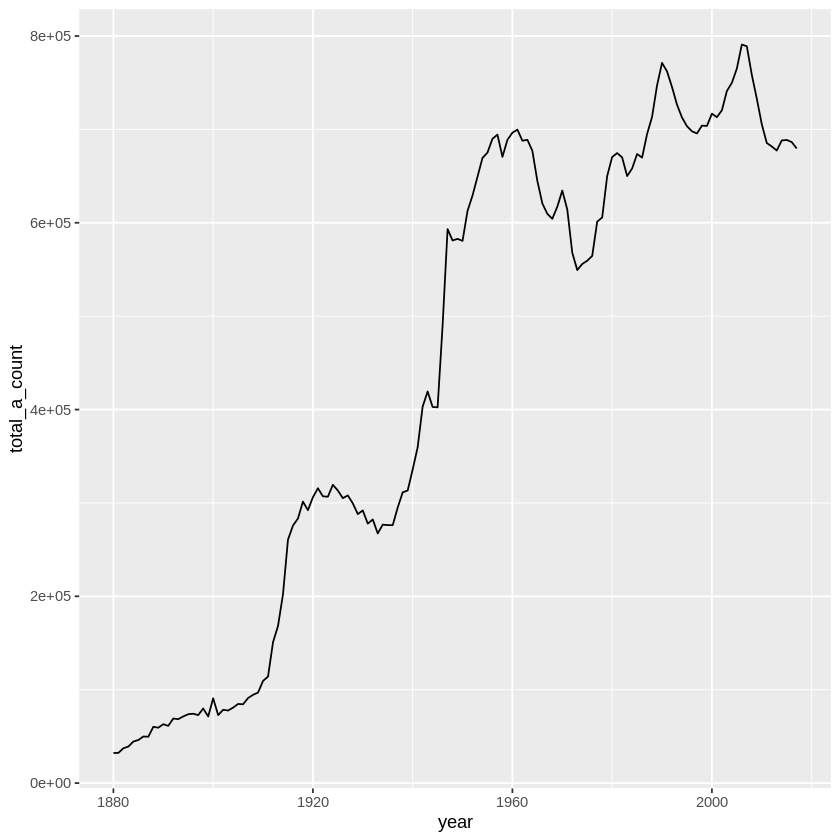

In [10]:
# What is the count of names ending in 'a' over time?
babynames %>%
  mutate(last_letter = str_sub(name, -1), .before = year) %>%
    filter(last_letter == 'a') %>%
    group_by(year) %>%
    summarise(total_a_count = sum(n), total_row_count = n()) %>%
      ggplot(aes(x = year, y = total_a_count)) +
      geom_line()


## &#129300; Quiz
# How many female babies names end in 'a'?
* 497580
* 469991
* more than 500000
* some other answer

In [16]:
babynames %>%
  filter(sex == 'F', str_sub(name, -1) == 'a') %>%
    summarize (total = sum(n))

total
<int>
58736718


### Using `word` function

In [ ]:
word('October 5th 1990 something else')

[1] "October"

In [20]:
sentences <- c("Jane saw a cat", "Jane sat down")
word(sentences)

[1] "Jane" "Jane"

In [17]:
?word

### Back to mpg dataset

Let us find the proportion of cyl across the various manufacturers


In [ ]:
mpg %>% print

# A tibble: 234 × 11
   manufacturer model      displ  year   cyl trans drv     cty   hwy fl    class
   <chr>        <chr>      <dbl> <int> <int> <chr> <chr> <int> <int> <chr> <chr>
 1 audi         a4           1.8  1999     4 auto… f        18    29 p     comp…
 2 audi         a4           1.8  1999     4 manu… f        21    29 p     comp…
 3 audi         a4           2    2008     4 manu… f        20    31 p     comp…
 4 audi         a4           2    2008     4 auto… f        21    30 p     comp…
 5 audi         a4           2.8  1999     6 auto… f        16    26 p     comp…
 6 audi         a4           2.8  1999     6 manu… f        18    26 p     comp…
 7 audi         a4           3.1  2008     6 auto… f        18    27 p     comp…
 8 audi         a4 quattro   1.8  1999     4 manu… 4        18    26 p     comp…
 9 audi         a4 quattro   1.8  1999     4 auto… 4        16    25 p     comp…
10 audi         a4 quattro   2    2008     4 manu… 4        20    28 p     comp…
# ℹ 224

In [22]:
data <-
    mpg %>% group_by(manufacturer, cyl) %>%
    summarize(count = n()) %>%
    mutate(prop = count/sum(count)) %>%
    filter(manufacturer %in% c('audi', 'chevrolet', 'dodge'))

data %>% print

`summarise()` has grouped output by 'manufacturer'. You can override using the
`.groups` argument.


# A tibble: 9 × 4
# Groups:   manufacturer [3]
  manufacturer   cyl count   prop
  <chr>        <int> <int>  <dbl>
1 audi             4     8 0.444 
2 audi             6     9 0.5   
3 audi             8     1 0.0556
4 chevrolet        4     2 0.105 
5 chevrolet        6     3 0.158 
6 chevrolet        8    14 0.737 
7 dodge            4     1 0.0270
8 dodge            6    15 0.405 
9 dodge            8    21 0.568 


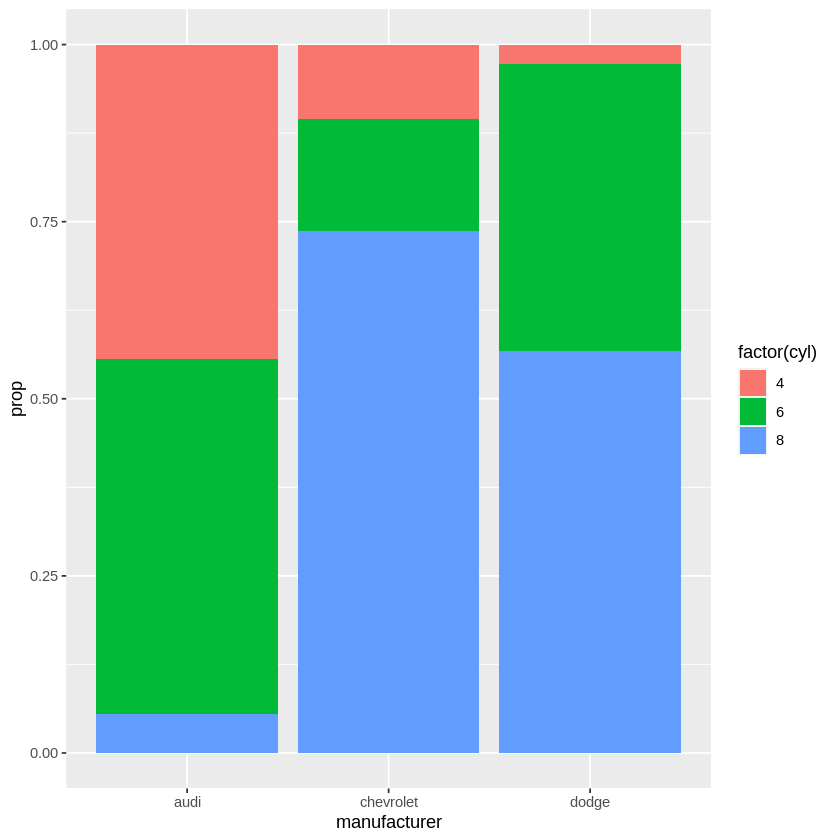

In [27]:
ggplot(data, aes(x = manufacturer, y = prop, fill = factor(cyl))) +
  geom_bar(stat = 'identity')

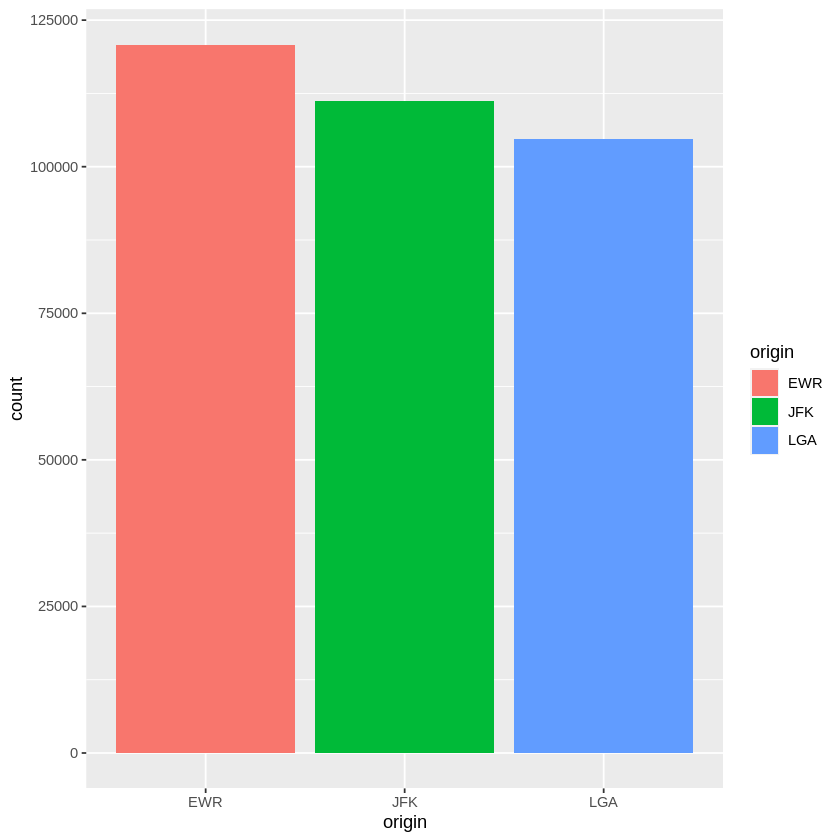

In [25]:
flights %>%
  ggplot(aes(x = origin, fill = origin)) +
    geom_bar()

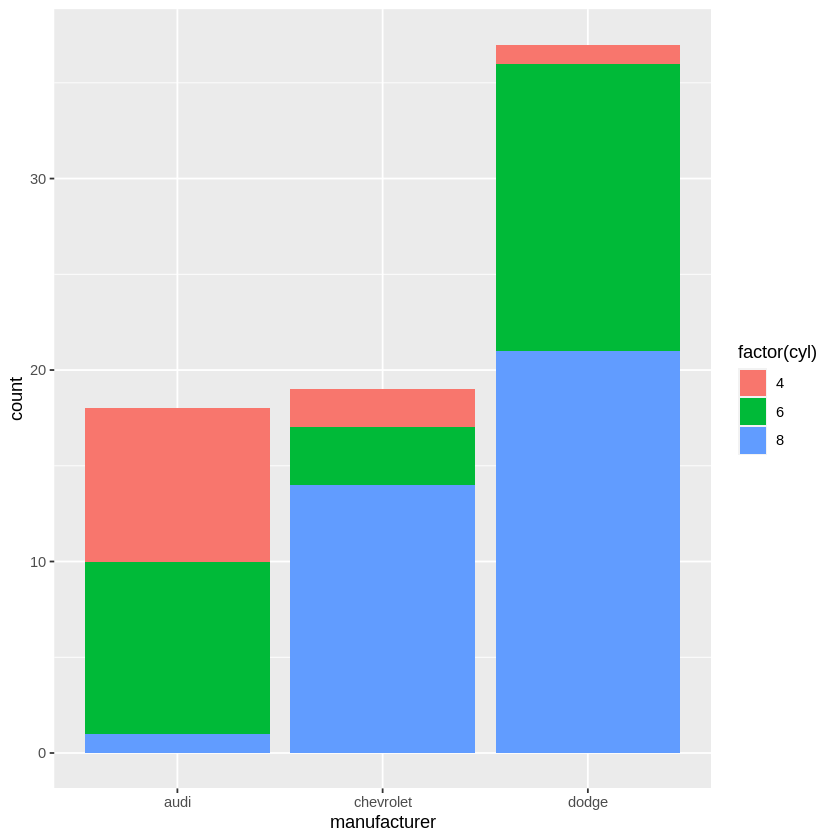

In [ ]:
mpg %>% filter(manufacturer %in% c('audi', 'chevrolet', 'dodge')) %>%
        ggplot(aes(x = manufacturer, fill = factor(cyl))) +
          geom_bar()

### stat = 'identity'
When you set stat = "identity", you are telling ggplot2 to use the actual values from your data to determine the heights of the bars. Otherwise, the default is stat = 'count'. In the default case, ggplot2 will automatically calculate the count (frequency) of each category and use these counts to determine the heights of the bars.

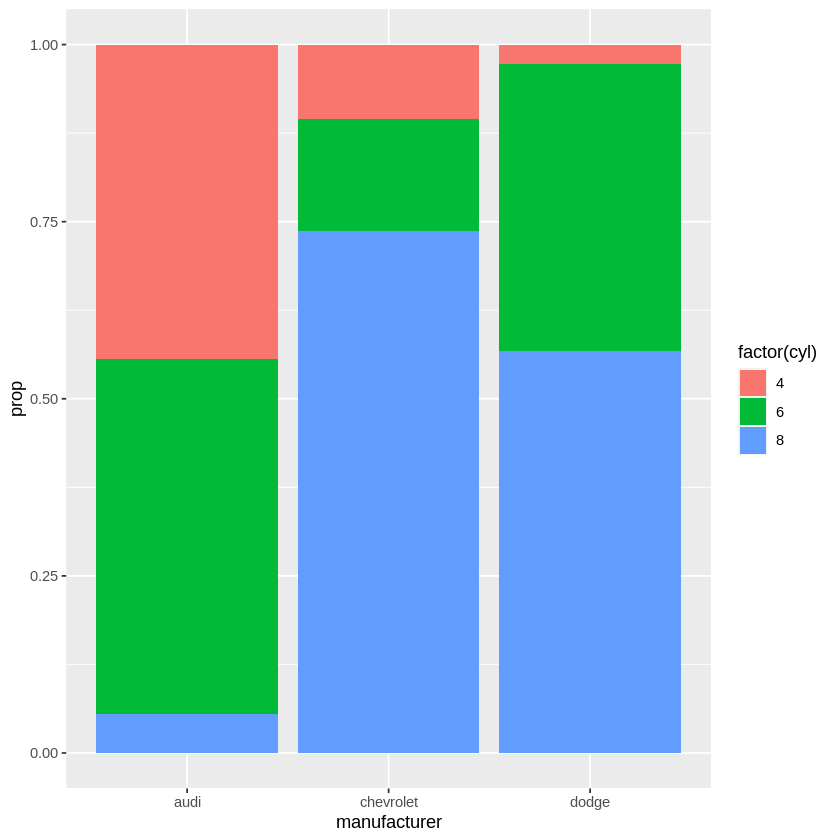

In [30]:
ggplot(data, aes(x = manufacturer, y = prop, fill = factor(cyl))) +
  geom_col()